In [57]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Linear Regression

In [21]:
X = np.arange(-10,10,1)
Y = 10*X + 5 + np.random.normal(loc=0,scale=20.0,size=len(X))

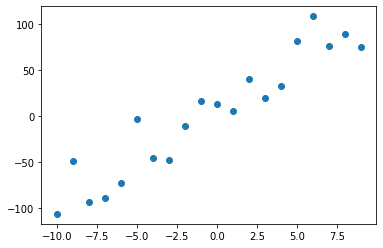

In [22]:
plt.figure()
plt.scatter(X,Y)
plt.show()

In [24]:
XX = np.reshape(X,(len(X),1))
model = LinearRegression()
model.fit(XX,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(model.coef_)
print(model.intercept_)

[10.42589215]
7.110132144158675


Modelo $y = mx + b$

In [29]:
m = model.coef_[0]
b = model.intercept_

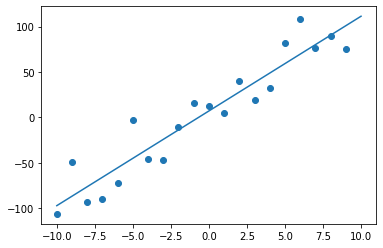

In [30]:
plt.figure()
plt.scatter(X,Y)
plt.plot([-10,10],[m*-10+b,m*10+b])
plt.show()

# Linear Regression - Quadratic Model

In [40]:
X = np.arange(-10,10,1)
Y = 10*X**2 + 20*X + 5 + np.random.normal(loc=0,scale=20.0,size=len(X))

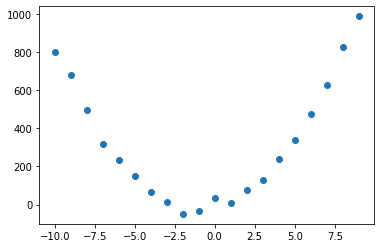

In [41]:
plt.figure()
plt.scatter(X,Y)
plt.show()

In [50]:
XX = np.reshape(X,(len(X),1))
print('XX',XX.shape)
XX = np.concatenate((XX**2,XX),axis=1)
print('XX',XX.shape)
print(XX[:10])

XX (20, 1)
XX (20, 2)
[[100 -10]
 [ 81  -9]
 [ 64  -8]
 [ 49  -7]
 [ 36  -6]
 [ 25  -5]
 [ 16  -4]
 [  9  -3]
 [  4  -2]
 [  1  -1]]


In [51]:
model = LinearRegression()
model.fit(XX,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(model.coef_)
print(model.intercept_)

[10.321165   20.16367036]
-14.38134839221982


Modelo  $𝑦=b_2 x^2 + b_1 x + 𝑏_0$

In [53]:
b2 = model.coef_[0]
b1 = model.coef_[1]
b0 = model.intercept_

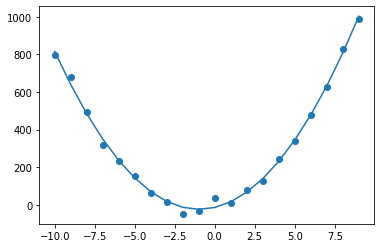

In [55]:
plt.figure()
plt.scatter(X,Y)
x1 = -10
x2 = 10
plt.plot(X,b2*X**2+b1*X+b0)
plt.show()

# Linear Regression - winequality

In [58]:
df = pandas.read_csv('../Datasets/winequality-red.csv',sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [59]:
X = df.values[:,:-1]
Y = df.values[:,-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=42)
print('X',X.shape)
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

X (1599, 11)
Xtrain (1119, 11)
Xtest (480, 11)


In [61]:
model = LinearRegression()
model.fit( Xtrain, ytrain )
ypred = model.predict( Xtest )
print('MSE',mean_absolute_error(ytest,ypred))

MSE 0.5133956082451127


In [62]:
print(model.coef_)
print(model.intercept_)
print(df.columns)

[ 2.34704718e-02 -1.09961969e+00 -2.47859776e-01  7.73785620e-03
 -1.67359251e+00  4.55041815e-03 -3.26389168e-03 -1.42395563e+01
 -3.19247444e-01  8.12824701e-01  2.91991158e-01]
17.96257833923437
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


# Linear Regression - winequality - normalized features

In [77]:
for i in range(X.shape[1]):
    print(df.columns[i],'[',np.min(X[:,i]),np.max(X[:,i]),']')

fixed acidity [ 4.6 15.9 ]
volatile acidity [ 0.12 1.58 ]
citric acid [ 0.0 1.0 ]
residual sugar [ 0.9 15.5 ]
chlorides [ 0.012 0.611 ]
free sulfur dioxide [ 1.0 72.0 ]
total sulfur dioxide [ 6.0 289.0 ]
density [ 0.9900700000000001 1.00369 ]
pH [ 2.74 4.01 ]
sulphates [ 0.33 2.0 ]
alcohol [ 8.4 14.9 ]


In [78]:
XN = X.copy()
for i in range(X.shape[1]):
    XN[:,i] = ( X[:,i]-np.mean(X[:,i]) ) / np.std(X[:,i]) 
    print(df.columns[i],'[',np.min(XN[:,i]),np.max(XN[:,i]),']')

fixed acidity [ -2.137044857303386 4.355149169489777 ]
volatile acidity [ -2.278279740306604 5.87797605428994 ]
citric acid [ -1.3914722776605752 3.743573931527866 ]
residual sugar [ -1.1626963374974064 9.19568145158918 ]
chlorides [ -1.6039448910707979 11.127034553969864 ]
free sulfur dioxide [ -1.422500194981801 5.367284317782079 ]
total sulfur dioxide [ -1.2305837697169284 7.375153940009771 ]
density [ -3.538731398195885 3.6800551248443094 ]
pH [ -3.700401226239349 4.528281970573037 ]
sulphates [ -1.9365072908482162 7.918676551599458 ]
alcohol [ -1.8989185965323547 4.202452586112064 ]


In [79]:
Xtrain, Xtest, ytrain, ytest = train_test_split(XN, Y, test_size=0.30, random_state=42)
print('X',X.shape)
print('Xtrain',Xtrain.shape)
print('Xtest',Xtest.shape)

X (1599, 11)
Xtrain (1119, 11)
Xtest (480, 11)


In [80]:
model = LinearRegression()
model.fit( Xtrain, ytrain )
ypred = model.predict( Xtest )
print('MSE',mean_absolute_error(ytest,ypred))

MSE 0.5133956082451123


In [81]:
print(model.coef_)
print(model.intercept_)
print(df.columns)

[ 0.04085157 -0.196836   -0.04826827  0.01090641 -0.0787435   0.0475832
 -0.1073332  -0.02686639 -0.04927207  0.13773637  0.3110682 ]
5.632195275306748
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
